In [ ]:
import numpy as np
import pickle

# Parallel computation
from joblib import Parallel, delayed

# Import methods and simulation function
from method import *
from simul import simul_uniform_mixture

# Clean up the output
np.set_printoptions(precision=2, suppress=True)

# Set the random seed for reproducibility
SEED = 20241225

# Reproducing the Simulation Experiments
All functions generating simulated data are included in `simul.py`.  

To run codes, create directories `./results/simulation/` (for Setting 1) and `./results/simulation2/` (for Setting 2) to save the simulation results.

## Setting 1

##### Differential Evolution (DE)

In [ ]:
def run_de_parallel(n, reps, njobs, noise=0, K=3, loss="Loss1", save=True):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")
        
        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting1", eps=noise, seed=seed)
        
        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)
        
        # Set independent seed for DE algorithm; differ by loss function
        indep_seed = 0 if loss == "Loss1" else 200
        
        # Run the DE algorithm
        return run_de(data_class, K=K, loss=loss, seed=indep_seed + i)
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    if save:
        # Create a directory ./results/simulation/ first
        with open(f'results/simulation/de-n{n}K{K}_noise{noise}_{loss}.pkl', 'wb') as f:
            pickle.dump(result_list, f)

    return result_list

In [ ]:
# Be sure to put your number of cores here
njobs = 100

# 33min with 100 cores
rep100_result = run_de_parallel(n=200, reps=100, njobs=njobs, noise=0, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, njobs=njobs, noise=0, loss="Loss2")
rep100_result = run_de_parallel(n=200, reps=100, njobs=njobs, noise=5, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, njobs=njobs, noise=5, loss="Loss2")
rep100_result = run_de_parallel(n=200, reps=100, njobs=njobs, noise=10, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, njobs=njobs, noise=10, loss="Loss2")

In [ ]:
noise_levels = [0, 5, 10]
loss_types = ['Loss1', 'Loss2']
n, K = 200, 3

for i, noise in enumerate(noise_levels):
    for j, loss in enumerate(loss_types):
        # Load saved results
        with open(f'results/simulation/de-n{n}K{K}_noise{noise}_{loss}.pkl', 'rb') as fi:
            res = pickle.load(fi)
        
        # Extract thresholds and losses
        stacked_array = np.stack([result[0] for result in res])
        thresholds = stacked_array[:, 1:4]
        losses = np.array([result[1] for result in res])
        
        print(f"Noise {noise} - {loss}")
        print(f"    thresholds: {np.mean(thresholds, 0)} +/- {np.std(thresholds, 0)}")
        print(f"    Loss: {np.mean(losses)} +/- {np.std(losses)}\n")

Noise 0 - Loss1
    thresholds: [ 70.23671642 180.05824718 250.96995035] +/- [0.25551239 0.50115214 0.72129488]
    Loss: 6.346829632252475 +/- 0.2884373725594362

Noise 0 - Loss2
    thresholds: [ 70.51608372 179.9331753  252.18710734] +/- [0.65039513 0.95740488 1.64659149]
    Loss: 9286.83153313424 +/- 1411.4966141161703

Noise 5 - Loss1
    thresholds: [ 73.5036317  179.85916763 255.41695742] +/- [0.6685274  0.88620249 0.8961123 ]
    Loss: 11.457815240920901 +/- 0.6587366376125149

Noise 5 - Loss2
    thresholds: [ 74.28611463 178.89568975 255.2980649 ] +/- [1.55993438 1.43864451 1.77976981]
    Loss: 18842.462920896898 +/- 2939.711934353912

Noise 10 - Loss1
    thresholds: [ 74.07350157 178.2708488  257.85458413] +/- [1.00699174 1.53575747 1.35388558]
    Loss: 23.569797654051442 +/- 1.3424488097272274

Noise 10 - Loss2
    thresholds: [ 74.49557585 177.28802461 256.41711363] +/- [1.73477413 2.59642309 2.80723059]
    Loss: 45062.03190536064 +/- 6786.18522595192



##### Stepwise Aggregation (SA)

In [ ]:
def run_greedy_parallel(n, reps, njobs, K=2, loss="Loss1", noise=0, save=True):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting1", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Run SA algorithm
        return agglomerative_discrete(data_class, K=K, loss=loss, thresholds=list(np.arange(40, 401, 2)))
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    if save:
        with open(f'results/simulation/sa-n{n}_noise{noise}_{loss}.pkl', 'wb') as f:
            pickle.dump(result_list, f)
    return result_list

In [ ]:
# Takes a lot of time to run (5-10 times higher than DE) / about 290 min with 100 cores total
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=100, loss="Loss1")
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=100, loss="Loss2")
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=100, noise=5, loss="Loss1")
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=100, noise=5, loss="Loss2")
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=100, noise=10, loss="Loss1")
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=100, noise=10, loss="Loss2")

In [ ]:
noise_levels = [0, 5, 10]
loss_types = ['Loss1', 'Loss2']
n, K = 200, 2

for noise in noise_levels:
    for loss in loss_types:
        # Load saved results
        with open(f"results/simulation/sa-n{n}_noise{noise}_{loss}.pkl", 'rb') as f:
            res = pickle.load(f)

        # Extract thresholds and losses
        thresholds = np.array([r['thresholds_history'][-2] for r in res])
        losses = np.array([r['loss_history'][3] for r in res])
        print(f"Noise {noise} - {loss}")
        print(f"    Thresholds: {thresholds.mean(axis=0)} +/- {thresholds.std(axis=0)}")
        print(f"    Loss: {losses.mean(axis=0)} +/- {losses.std(axis=0)}\n")

Noise 0 - Loss1
    Thresholds: [[ 70.   180.08 250.08]] +/- [[0.         0.48332184 0.39191836]]
    Loss: 6.428528066442426 +/- 0.29366768002548316

Noise 0 - Loss2
    Thresholds: [[ 70.   180.28 250.32]] +/- [[0.         1.20066648 0.96829747]]
    Loss: 10184.221134959984 +/- 1813.0407930127965

Noise 5 - Loss1
    Thresholds: [[ 76.08 180.3  256.28]] +/- [[3.36951035 4.19880936 4.99615852]]
    Loss: 15.650353437224606 +/- 3.518173641551902

Noise 5 - Loss2
    Thresholds: [[ 76.84 178.88 255.46]] +/- [[3.93120847 5.41346469 5.43216347]]
    Loss: 28424.587925789307 +/- 8466.974953060178

Noise 10 - Loss1
    Thresholds: [[ 78.46 176.64 263.  ]] +/- [[7.13781479 9.31184192 7.5868307 ]]
    Loss: 37.64954937027136 +/- 8.555078188185256

Noise 10 - Loss2
    Thresholds: [[ 78.02 176.32 259.88]] +/- [[ 8.03738764 10.44497966  8.92107617]]
    Loss: 74446.60662524655 +/- 19311.147593889385



##### Stepwise Splitting (SS)

In [ ]:
def run_greedy_parallel(n, reps, njobs, K=3, loss="Loss1", noise=0, save=True):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting1", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Run SS algorithm
        return divisive_discrete(data_class, K=K, loss=loss, thre_list=np.arange(40, 401, 2))
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    if save:
        with open(f'results/simulation/ss-n{n}_noise{noise}_{loss}.pkl', 'wb') as f:
            pickle.dump(result_list, f)
    return result_list

In [ ]:
# 16 min with 50 cores
res1 = run_greedy_parallel(n=200, reps=100, njobs=50, loss="Loss1")
res2 = run_greedy_parallel(n=200, reps=100, njobs=50, loss="Loss2")
res1 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=5, loss="Loss1")
res2 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=5, loss="Loss2")
res1 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=10, loss="Loss1")
res2 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=10, loss="Loss2")

In [ ]:
noise_levels = [0, 5, 10]
loss_types = ['Loss1', 'Loss2']
n, K = 200, 3

for noise in noise_levels:
    for loss in loss_types:
        # Load saved results
        with open(f'results/simulation/ss-n{n}_noise{noise}_{loss}.pkl', 'rb') as f:
            res = pickle.load(f)

        # Extract thresholds and losses
        thresholds = np.array([r['thresholds'] for r in res])
        losses = np.array([r['loss_history'][3] for r in res])
        print(f"Noise {noise} - {loss}")
        print(f"    Thresholds: {thresholds.mean(axis=0)} +/- {thresholds.std(axis=0)}")
        print(f"    Loss: {losses.mean(axis=0)} +/- {losses.std(axis=0)}\n")

Noise 0 - Loss1
    Thresholds: [ 79.88 226.4  251.76] +/- [ 3.08311531 11.81524439  3.30187825]
    Loss: 71.5146959296384 +/- 12.479275496525435

Noise 0 - Loss2
    Thresholds: [ 68.64 189.56 259.72] +/- [ 2.41462212 19.99315883 11.53089762]
    Loss: 80756.07196562992 +/- 27325.129168388266

Noise 5 - Loss1
    Thresholds: [ 81.54 227.78 257.54] +/- [ 2.65111297 12.86823997  5.16027131]
    Loss: 82.27699233503195 +/- 10.24128412772453

Noise 5 - Loss2
    Thresholds: [ 72.48 187.84 257.2 ] +/- [ 3.76425291 22.9288988  16.78094157]
    Loss: 96375.27812498575 +/- 31023.043486289665

Noise 10 - Loss1
    Thresholds: [ 82.96 229.04 264.1 ] +/- [2.44098341 5.75833309 3.39852909]
    Loss: 97.121528308089 +/- 9.332753034453212

Noise 10 - Loss2
    Thresholds: [ 73.02 186.2  255.76] +/- [ 3.82094229 25.88822126 19.59853056]
    Loss: 134456.46743254832 +/- 33141.920566214096



##### Oracle thresholds (70, 180, 250)

In [ ]:
thresholds = (40, 70, 180, 250, 400)
noise_list = [0, 5, 10]
n = 200

# Parallel computation for different noise levels
def run_1rep(j):
    loss1 = np.zeros(100)
    loss2 = np.zeros(100)
    for i in range(100):
        # Generate simulation data        
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting1", eps=noise_list[j], seed=seed)
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Compute losses with fitness function
        data_class.Wdist_matrix()
        loss1[i] = fitness(thresholds[1:4], data_class, loss="Loss1")
        loss2[i] = fitness(thresholds[1:4], data_class, loss="Loss2") 
    return loss1, loss2

# 5min
result_list = Parallel(n_jobs=3)(delayed(run_1rep)(j) for j in range(3))

In [ ]:
for j, noise in enumerate(noise_list):
    loss1, loss2 = result_list[j]
    print(f"Noise {noise}")
    print(f"    Loss1: {np.mean(loss1)} +/- {np.std(loss1)}")
    print(f"    Loss2 (x 10^(-3)): {np.mean(loss2) / 1000} +/- {np.std(loss2) / 1000}\n")

Noise 0
    Loss1: 6.419770867874496 +/- 0.29006527579654307
    Loss2 (x 10^(-3)): 9.93150830764615 +/- 1.6429380437067371

Noise 5
    Loss1: 17.148259407862277 +/- 1.4948257601404067
    Loss2 (x 10^(-3)): 29.427385964629284 +/- 5.3732762273236885

Noise 10
    Loss1: 32.88758984433337 +/- 2.960731988810598
    Loss2 (x 10^(-3)): 60.0610265358689 +/- 9.546988401007942



##### Principal Amalgamation Analysis (PAA)

In [ ]:
def run_greedy_parallel(n, reps, njobs, K=3, noise=0, save=True):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting1", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Run PAA algorithm
        return agglomerative_BC(data_class, K=K, thresholds=list(np.arange(40, 401, 2)))
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    if save:
        with open(f'results/simulation/paa-n{n}_noise{noise}.pkl', 'wb') as f:
            pickle.dump(result_list, f)
    return result_list

In [ ]:
# 85 min with 50 cores
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=50, noise=0)
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=50, noise=5)
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=50, noise=10)

In [ ]:
n, K = 200, 3

for noise in [0, 5, 10]:
    print(f"Results for noise {noise}")
    
    # Load saved results
    with open(f'results/simulation/paa-n{n}_noise{noise}.pkl', "rb") as f:
        result = pickle.load(f)
    
    # Extract thresholds
    res_array = np.zeros((100, 3))
    for i in range(100):
        res_array[i] = np.array(result[i]['thresholds'])
    print(f"    Thresholds: {np.mean(res_array, axis=0)} +/- {np.std(res_array, 0)} \n")

Results for noise 0
    Thresholds: [ 70. 180. 250.] +/- [0. 0. 0.] 

Results for noise 5
    Thresholds: [ 74.86 178.48 256.84] +/- [5.58035841 3.34807407 4.86768939] 

Results for noise 10
    Thresholds: [ 67.56 170.72 251.16] +/- [ 9.28043102 22.79564871 21.19090371] 



## Setting 2

##### DE ($K=3$)
Thresholds are only printed for $L_1$ loss. $L_2$ loss results are visualized

In [ ]:
def run_de_parallel(n, reps, njobs, noise=0, K=3, loss="Loss1"):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting2", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)
        
        # Set independent seed for DE algorithm; different from Setting 1
        indep_seed = 1000 if loss == "Loss1" else 2000

        # Run the DE algorithm
        return run_de(data_class, K=K, loss=loss, seed=indep_seed + i)
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    # Save results - make sure the directory exists
    with open(f'results/simulation2/de-n{n}K{K}_noise{noise}_{loss}.pkl', 'wb') as f:
        pickle.dump(result_list, f)

    return result_list

In [ ]:
# 40 min with 100 cores
rep100_result = run_de_parallel(n=200, reps=100, njobs=100, noise=0, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, njobs=100, noise=0, loss="Loss2")
rep100_result = run_de_parallel(n=200, reps=100, njobs=100, noise=5, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, njobs=100, noise=5, loss="Loss2")
rep100_result = run_de_parallel(n=200, reps=100, njobs=100, noise=10, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, njobs=100, noise=10, loss="Loss2")

In [ ]:
noise_levels = [0, 5, 10]
loss_types = ['Loss1']
n, K = 200, 3

for i, noise in enumerate(noise_levels):
    for j, loss in enumerate(loss_types):
        # Load saved results
        with open(f'results/simulation2/de-n{n}K{K}_noise{noise}_{loss}.pkl', 'rb') as fi:
            res = pickle.load(fi)
        
        # Extract thresholds and losses
        stacked_array = np.stack([result[0] for result in res])
        thresholds = stacked_array[:, 1:4]
        losses = np.array([result[1] for result in res])
        
        print(f"Noise {noise} - {loss}")
        print(f"    thresholds: {np.mean(thresholds, 0)} +/- {np.std(thresholds, 0)}")
        print(f"    loss: {np.mean(losses)} +/- {np.std(losses)}\n")

Noise 0 - Loss1
    thresholds: [ 70.13057089 179.82976351 250.86280938] +/- [0.18918423 0.70957897 0.60111776]
    loss: 6.462898434056665 +/- 0.26027154729519103

Noise 5 - Loss1
    thresholds: [ 74.63824007 178.50580813 253.84697449] +/- [0.77748916 1.28631542 0.66290863]
    loss: 12.90386794034729 +/- 0.8918389494511436

Noise 10 - Loss1
    thresholds: [ 76.0647413  175.0700969  255.30566896] +/- [1.00122952 2.02873676 0.99400797]
    loss: 26.73422095503433 +/- 2.0064769426360107



##### DE ($K=2$, $L_2$ loss)

In [ ]:
def run_de_parallel(n, reps, njobs, noise=0, K=2, loss="Loss1"):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting2", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)
        
        # Set independent seed for DE algorithm; different from above settings
        indep_seed = 10000 if loss == "Loss1" else 20000

        # Run the DE algorithm
        return run_de(data_class, K=K, loss=loss, seed=indep_seed + i)
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    with open(f'results/simulation2/de-n{n}K{K}_noise{noise}_{loss}.pkl', 'wb') as f:
        pickle.dump(result_list, f)

    return result_list

In [ ]:
# 15 min with 100 cores
rep100_result = run_de_parallel(n=200, reps=100, K=2, njobs=100, noise=0, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, K=2, njobs=100, noise=0, loss="Loss2")
rep100_result = run_de_parallel(n=200, reps=100, K=2, njobs=100, noise=5, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, K=2, njobs=100, noise=5, loss="Loss2")
rep100_result = run_de_parallel(n=200, reps=100, K=2, njobs=100, noise=10, loss="Loss1")
rep100_result = run_de_parallel(n=200, reps=100, K=2, njobs=100, noise=10, loss="Loss2")

In [ ]:
noise_levels = [0, 5, 10]
loss = "Loss2"
n, K = 200, 2

for i, noise in enumerate(noise_levels):
    # Load saved results
    with open(f'results/simulation2/de-n{n}K{K}_noise{noise}_{loss}.pkl', 'rb') as fi:
        res = pickle.load(fi)
    
    # Extract thresholds and losses
    stacked_array = np.stack([result[0] for result in res])
    thresholds = stacked_array[:, 1:3]
    losses = np.array([result[1] for result in res])
    
    print(f"Noise {noise} - {loss}")
    print(f"    thresholds: {np.mean(thresholds, 0)} +/- {np.std(thresholds, 0)}")
    print(f"    loss: {np.mean(losses)} +/- {np.std(losses)}\n")

Noise 0 - Loss2
    thresholds: [ 73.24756729 186.31194318] +/- [3.52028838 8.35270718]
    loss: 3340.6062492634005 +/- 373.42404471229975

Noise 5 - Loss2
    thresholds: [ 76.82046199 195.79334669] +/- [ 4.1594718  11.16733302]
    loss: 8427.205599467916 +/- 1354.9682661730624

Noise 10 - Loss2
    thresholds: [ 79.0539674  204.71837052] +/- [ 6.10374431 17.83340778]
    loss: 24927.027940769913 +/- 3993.2324315544934



##### SA

In [ ]:
def run_greedy_parallel(n, reps, njobs, K=2, loss="Loss1", noise=0, save=True):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting2", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Run SA algorithm
        return agglomerative_discrete(data_class, K=K, loss=loss, thresholds=list(np.arange(40, 401, 2)))
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    if save:
        with open(f'results/simulation2/sa-n{n}K{K}-noise{noise}_{loss}.pkl', 'wb') as f:
            pickle.dump(result_list, f)
    return result_list

In [ ]:
# VERY time consuming: 5-10 times more than DE
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=100, noise=0, loss="Loss1")
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=100, noise=0, loss="Loss2")
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=100, noise=5, loss="Loss1")
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=100, noise=5, loss="Loss2")
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=100, noise=10, loss="Loss1")
rep100_result = run_greedy_parallel(n=200, reps=100, njobs=100, noise=10, loss="Loss2")

In [ ]:
# Loss 1
noise_levels = [0, 5, 10]
loss_types = ['Loss1']
n, K = 200, 2

for noise in noise_levels:
    for loss in loss_types:
        # Load saved results
        with open(f"results/simulation2/sa-n{n}K{K}-noise{noise}_{loss}.pkl", 'rb') as f:
            res = pickle.load(f)

        # Extract thresholds and L1 losses
        thresholds3 = np.array([r['thresholds_history'][-2] for r in res])
        losses3 = np.array([r['loss_history'][3] for r in res])
        print(f"Noise {noise} - {loss}")
        print(f"    Thresholds 3: {thresholds3.mean(axis=0)} +/- {thresholds3.std(axis=0)}")
        print(f"    Loss 1: {losses3.mean(axis=0)} +/- {losses3.std(axis=0)}")

Noise 0 - Loss1
    Thresholds 3: [[ 70.  180.1 250. ]] +/- [[0.         1.07238053 0.        ]]
    Loss 1: 6.555245464228274 +/- 0.2745699178964396
Noise 5 - Loss1
    Thresholds 3: [[ 77.72 178.32 254.36]] +/- [[3.57793236 4.6279153  4.91023421]]
    Loss 1: 18.333083355814825 +/- 4.217561047809942
Noise 10 - Loss1
    Thresholds 3: [[ 79.92 173.18 258.04]] +/- [[8.21666599 9.52510367 7.9999    ]]
    Loss 1: 44.13493044716267 +/- 11.912750541945302


In [ ]:
# Loss 2
noise_levels = [0, 5, 10]
loss_types = ['Loss2']
n, K = 200, 2

for noise in noise_levels:
    for loss in loss_types:
        # Load saved results
        with open(f"results/simulation2/sa-n{n}K{K}-noise{noise}_{loss}.pkl", 'rb') as f:
            res = pickle.load(f)

        # Extract thresholds and L2 losses (both K=3 and K=2)
        thresholds3 = np.array([r['thresholds_history'][-2] for r in res])
        thresholds = np.array([r['thresholds_history'][-1] for r in res])
        losses3 = np.array([r['loss_history'][3] for r in res])
        losses = np.array([r['loss_history'][2] for r in res])
        print(f"Noise {noise} - {loss}")
        print(f"    Thresholds 3: {thresholds3.mean(axis=0)} +/- {thresholds3.std(axis=0)}")
        print(f"    Thresholds 2: {thresholds.mean(axis=0)} +/- {thresholds.std(axis=0)}")
        print(f"    Loss at 3 thresolds: {losses3.mean(axis=0)} +/- {losses3.std(axis=0)}")
        print(f"    Loss at 2 thresolds: {losses.mean(axis=0)} +/- {losses.std(axis=0)}\n")

Noise 0 - Loss2
    Thresholds 3: [[ 70.   123.44 182.04]] +/- [[ 0.         14.11971671 10.09150137]]
    Thresholds 2: [[ 70.   180.44]] +/- [[0.        3.1315172]]
    Loss at 3 thresolds: 1891.9647565997147 +/- 273.1504593739156
    Loss at 2 thresolds: 3826.93139746635 +/- 745.7087568613687

Noise 5 - Loss2
    Thresholds 3: [[ 65.9   88.22 187.76]] +/- [[ 4.73603209 23.7417691  18.44186542]]
    Thresholds 2: [[ 77.9  181.64]] +/- [[3.55949435 7.92151501]]
    Loss at 3 thresolds: 7308.2330571112525 +/- 2081.4671516971616
    Loss at 2 thresolds: 16138.53241241871 +/- 7050.634960550506

Noise 10 - Loss2
    Thresholds 3: [[ 65.9  111.18 210.12]] +/- [[ 9.2795474  34.93318766 43.51259128]]
    Thresholds 2: [[ 79.62 172.82]] +/- [[ 7.86228974 14.7569509 ]]
    Loss at 3 thresolds: 27285.357702425794 +/- 11719.79680698674
    Loss at 2 thresolds: 51842.83648502197 +/- 15215.09436531728



##### SS

In [ ]:
def run_greedy_parallel(n, reps, njobs, K=3, loss="Loss1", noise=0, save=True):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting2", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Run SS algorithm
        return divisive_discrete(data_class, K=K, loss=loss, thre_list=np.arange(40, 401, 2))
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    if save:
        with open(f'results/simulation2/ss-n{n}-noise{noise}_{loss}.pkl', 'wb') as f:
            pickle.dump(result_list, f)
    return result_list

In [ ]:
# 15 min with 50 cores
res1 = run_greedy_parallel(n=200, reps=100, njobs=50, loss="Loss1")
res2 = run_greedy_parallel(n=200, reps=100, njobs=50, loss="Loss2")
res1 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=5, loss="Loss1")
res2 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=5, loss="Loss2")
res1 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=10, loss="Loss1")
res2 = run_greedy_parallel(n=200, reps=100, njobs=50, noise=10, loss="Loss2")

In [ ]:
# Loss 1
noise_levels = [0, 5, 10]
loss_types = ['Loss1']
n, K = 200, 2

for noise in noise_levels:
    for loss in loss_types:
        # Load saved results
        with open(f"results/simulation2/ss-n{n}-noise{noise}_{loss}.pkl", 'rb') as f:
            res = pickle.load(f)

        # Extract thresholds and L1 losses
        thresholds3 = np.array([r['thresholds'] for r in res])
        losses3 = np.array([r['loss_history'][3] for r in res])
        print(f"Noise {noise} - {loss}")
        print(f"    Thresholds 3: {thresholds3.mean(axis=0)} +/- {thresholds3.std(axis=0)}")
        print(f"    Loss 1: {losses3.mean(axis=0)} +/- {losses3.std(axis=0)}")

Noise 0 - Loss1
    Thresholds 3: [ 68.   227.92 252.12] +/- [0.         3.12307541 1.32121157]
    Loss 1: 39.941542344117785 +/- 3.9541373160310074
Noise 5 - Loss1
    Thresholds 3: [ 74.3  227.48 256.88] +/- [1.36747943 2.75129061 1.14262855]
    Loss 1: 48.546648893929756 +/- 4.930605176872384
Noise 10 - Loss1
    Thresholds 3: [ 77.32 227.06 261.36] +/- [1.362938   2.4405737  1.57175062]
    Loss 1: 66.30902264920945 +/- 5.384971527049133


In [ ]:
# Loss 2
noise_levels = [0, 5, 10]
loss_types = ['Loss2']
n, K = 200, 2

for noise in noise_levels:
    for loss in loss_types:
        # Load saved results
        with open(f"results/simulation2/ss-n{n}-noise{noise}_{loss}.pkl", 'rb') as f:
            res = pickle.load(f)

        # Extract thresholds and L2 losses (both K=3 and K=2)
        thresholds3 = np.array([r['thresholds'] for r in res])
        thresholds = np.array([r['thresholds_history'][:-1] for r in res])
        losses3 = np.array([r['loss_history'][3] for r in res])
        losses = np.array([r['loss_history'][2] for r in res])
        print(f"Noise {noise} - {loss}")
        print(f"    Thresholds 3: {thresholds3.mean(axis=0)} +/- {thresholds3.std(axis=0)}")
        print(f"    Thresholds 2: {thresholds.mean(axis=0)} +/- {thresholds.std(axis=0)}")
        print(f"    Loss at 3 thresolds: {losses3.mean(axis=0)} +/- {losses3.std(axis=0)}")
        print(f"    Loss at 2 thresolds: {losses.mean(axis=0)} +/- {losses.std(axis=0)}\n")

Noise 0 - Loss2
    Thresholds 3: [100.64 169.38 371.38] +/- [42.61350021 94.97144624 74.73028569]
    Thresholds 2: [133.2  283.26] +/- [  0.9797959  143.17923173]
    Loss at 3 thresolds: 15428.45439511857 +/- 2003.741091901828
    Loss at 2 thresolds: 15657.481880647138 +/- 2059.133168609543

Noise 5 - Loss2
    Thresholds 3: [ 48.34 131.04 386.3 ] +/- [18.8786758  12.61896985 36.21643273]
    Thresholds 2: [132.86 275.42] +/- [  1.02975725 162.9626448 ]
    Loss at 3 thresolds: 24173.580299869725 +/- 3245.0984991754135
    Loss at 2 thresolds: 25367.43277856605 +/- 3376.7259669576997

Noise 10 - Loss2
    Thresholds 3: [ 49.02 133.98 383.42] +/- [19.93689043 24.96636938  6.37052588]
    Thresholds 2: [131.48 210.98] +/- [  1.40342438 170.72140932]
    Loss at 3 thresolds: 46990.547843834844 +/- 8179.980855006448
    Loss at 2 thresolds: 53729.845752866415 +/- 8895.967736258077



##### Oracle thresholds
- (70, 180, 250) for Loss 1
- (70, 180) for Loss 2

In [ ]:
# K=4 for Loss1, K=3 for Loss2
thresholds = (40, 70, 180, 250, 400)
noise_list = [0, 5, 10]
n = 200

# Parallel computation for different noise levels
def run_1rep(j):
    loss1 = np.zeros(100)
    loss2 = np.zeros(100)
    for i in range(100):        
        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting2", eps=noise_list[j], seed=seed)
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Compute losses with fitness function
        data_class.Wdist_matrix()
        loss1[i] = fitness(thresholds[1:4], data_class, loss="Loss1")
        loss2[i] = fitness(thresholds[1:3], data_class, loss="Loss2") 
    return loss1, loss2

# 5min
result_list = Parallel(n_jobs=3)(delayed(run_1rep)(j) for j in range(3))

In [ ]:
for j, noise in enumerate(noise_list):
    loss1, loss2 = result_list[j]
    print(f"Noise {noise}")
    print(f"    Loss1: {np.mean(loss1)} +/- {np.std(loss1)}")
    print(f"    Loss2: {np.mean(loss2) / 1000} +/- {np.std(loss2) / 1000}\n")

Noise 0
    Loss1: 6.535178299752099 +/- 0.2697948483888605
    Loss2: 3.706201491175762 +/- 0.4554813224771409

Noise 5
    Loss1: 20.767097231958047 +/- 2.3057750297203548
    Loss2: 19.191846562921583 +/- 4.022911630454352

Noise 10
    Loss1: 38.52950582867654 +/- 3.8199066173953398
    Loss2: 41.401918644940245 +/- 6.261322810668768



##### PAA

In [ ]:
def run_greedy_parallel(n, reps, njobs, K=3, noise=0, save=True):
    # Function to run parallel replications
    def run_1rep(i):
        print(f"Running rep {i + 1}")

        # Generate simulation data
        seed = SEED + i
        data = simul_uniform_mixture(n, setting="Setting2", eps=noise, seed=seed)

        # Create a Distribution object
        data_class = Distribution(data, ran=(40., 400.), M=200)

        # Run PAA algorithm
        return agglomerative_BC(data_class, K=K, thresholds=list(np.arange(40, 401, 2)))
    
    # Run parallel replications
    result_list = Parallel(n_jobs=njobs)(delayed(run_1rep)(i) for i in range(reps))

    if save:
        with open(f'results/simulation2/paa-n{n}-noise{noise}.pkl', 'wb') as f:
            pickle.dump(result_list, f)
    return result_list

In [ ]:
# 85 min with 50 cores
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=50, noise=0)
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=50, noise=5)
rep100_result = run_greedy_parallel(n=200, reps=100, K=2, njobs=50, noise=10)

In [ ]:
n = 200

for noise in [0, 5, 10]:
    print(f"Results for noise {noise}")

    # Load saved results
    with open(f'results/simulation2/paa-n{n}-noise{noise}.pkl', "rb") as f:
        res = pickle.load(f)

    # Extract thresholds
    thresholds3 = np.array([r['thres_history'][-2] for r in res])
    thresholds = np.array([r['thres_history'][-1] for r in res])
    print(f"    Thresholds 3: {thresholds3.mean(axis=0)} +/- {thresholds3.std(axis=0)}")
    print(f"    Thresholds 2: {thresholds.mean(axis=0)} +/- {thresholds.std(axis=0)}")

Results for noise 0
    Thresholds 3: [ 70.   180.06 232.52] +/- [ 0.          0.59699246 15.72417247]
    Thresholds 2: [ 70.   180.06] +/- [0.         0.59699246]
Results for noise 5
    Thresholds 3: [ 63.74  77.64 179.4 ] +/- [ 2.85173631  3.63736168 22.90764065]
    Thresholds 2: [64.16 79.34] +/- [ 2.76665863 11.16800788]
Results for noise 10
    Thresholds 3: [ 56.16  76.82 162.82] +/- [ 4.25845042  8.26605105 42.90090442]
    Thresholds 2: [57.98 81.78] +/- [3.87293171 5.70540095]


## Visualizations for Setting 2

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

##### K=3 thresholds

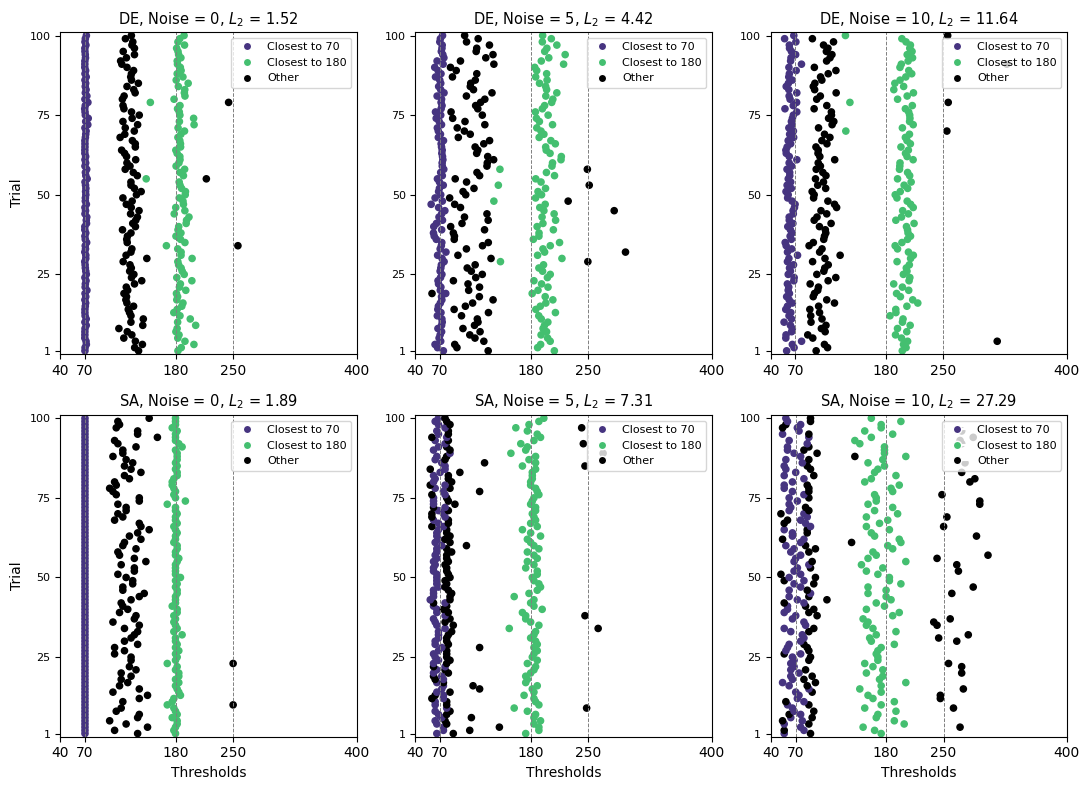

In [ ]:
noise_levels = [0, 5, 10]
n = 200

viridis = plt.get_cmap('viridis')
purple_color = viridis(0.15)  # viridis purple value
green_color = viridis(0.7)    # viridis green value

plt.figure(figsize=(11, 8))

methods_name = ['DE', 'SA']  # Methods

for k, method_name in enumerate(methods_name):
    for i, noise in enumerate(noise_levels):
        ax = plt.subplot(2, 3, k * 3 + i + 1)

        # Load data for each method
        if method_name == 'DE':
            with open(f'results/simulation2/de-n{n}K3_noise{noise}_Loss2.pkl', 'rb') as fi:
                res = pickle.load(fi)
            thresholds = np.stack([result[0] for result in res])[:, 1:4]
            loss = np.array([result[1] for result in res]) / 1000

        elif method_name == 'SA':
            with open(f"results/simulation2/sa-n{n}K2-noise{noise}_Loss2.pkl", 'rb') as f:
                res = pickle.load(f)
            thresholds = np.array([r['thresholds_history'][-2] for r in res])[:, 0, :]
            loss = np.array([r['loss_history'][3] for r in res]) / 1000

        # Scatter plot for thresholds
        for j in range(thresholds.shape[0]):
            trial = [j + 1] * 3
            color = ['black'] * 3
            blue_idx = np.argmin(np.abs(thresholds[j, :] - 70))
            green_idx = np.argmin(np.abs(thresholds[j, :] - 180))
            color[blue_idx] = purple_color
            color[green_idx] = green_color
            ax.scatter(thresholds[j, :], trial, c=color, s=20)

        # Vertical lines for base  thresholds
        plt.vlines([70, 180, 250], 0, 101, linestyle='--', color='grey', linewidth=0.7)
        
        plt.ylim(0, 101)
        plt.xticks([40, 70, 180, 250, 400])
        plt.yticks([1, 25, 50, 75, 100], fontsize=8)

        # Set title
        title = f"{method_name}, Noise = {noise}"
        if loss is not None:
            title += r", $L_2$ = {:.2f}".format(np.mean(loss))
        plt.title(title, fontsize=10.5)

        # Axis labels
        if k == 1:  # Bottom row
            plt.xlabel('Thresholds')
        if i == 0:  # Left column
            plt.ylabel('Trial')

        # Add legend
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', label='Closest to 70', markerfacecolor=purple_color, markersize=6),
            Line2D([0], [0], marker='o', color='w', label='Closest to 180', markerfacecolor=green_color, markersize=6),
            Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='black', markersize=6)
        ]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
# plt.savefig("./images/setting2.png", dpi=400, bbox_inches="tight")
plt.show()


In [ ]:
# Analysis of seemingly outliers for DE: compared to the loss at the oracle thresholds
oracle = np.array([40, 70, 180, 250, 400])
n = 200
noise_list = [0, 5, 10]

for noise in noise_list:
    with open(f'results/simulation2/de-n{n}K3_noise{noise}_Loss2.pkl', 'rb') as fi:
        res = pickle.load(fi)
    thresholds = np.stack([result[0] for result in res])[:, 1:4]
    losses = np.array([result[1] for result in res])

    # Those seemingly outliers have thresholds above 240
    print(f"Noise {noise}")

    indices = np.where(thresholds > 240)[0]
    print(f"    Indices of trials with a threshold > 240: {indices}")
    
    for index in indices:
        seed = SEED + index
        data = simul_uniform_mixture(n, setting="Setting2", eps=noise, seed=seed)
        data_class = Distribution(data, M=200)
        data_class.Wdist_matrix()

        # Compare with the losses at the oracle thresholds
        oracle_loss = fitness(oracle[1:4], data_class, loss="Loss2")
        improvement = -(losses[index] - oracle_loss) / oracle_loss * 100
        print(f"\tIndex {index}:", improvement, "% improvement from oracle loss")


Noise 0
    Indices of trials with a threshold > 240: [33 78]
	Index 33: 30.986323783621973 % improvement from oracle loss
	Index 78: 44.33439000101538 % improvement from oracle loss
Noise 5
    Indices of trials with a threshold > 240: [28 31 44 52 57]
	Index 28: 65.7040617592472 % improvement from oracle loss
	Index 31: 54.31192284840377 % improvement from oracle loss
	Index 44: 61.0776802894983 % improvement from oracle loss
	Index 52: 72.2501864192431 % improvement from oracle loss
	Index 57: 67.20197585572971 % improvement from oracle loss
Noise 10
    Indices of trials with a threshold > 240: [ 3 69 78 90 99]
	Index 3: 47.98816998372811 % improvement from oracle loss
	Index 69: 69.46005861059531 % improvement from oracle loss
	Index 78: 54.020485167637176 % improvement from oracle loss
	Index 90: 59.796785766223984 % improvement from oracle loss
	Index 99: 57.90288765594368 % improvement from oracle loss


Supplemental figures

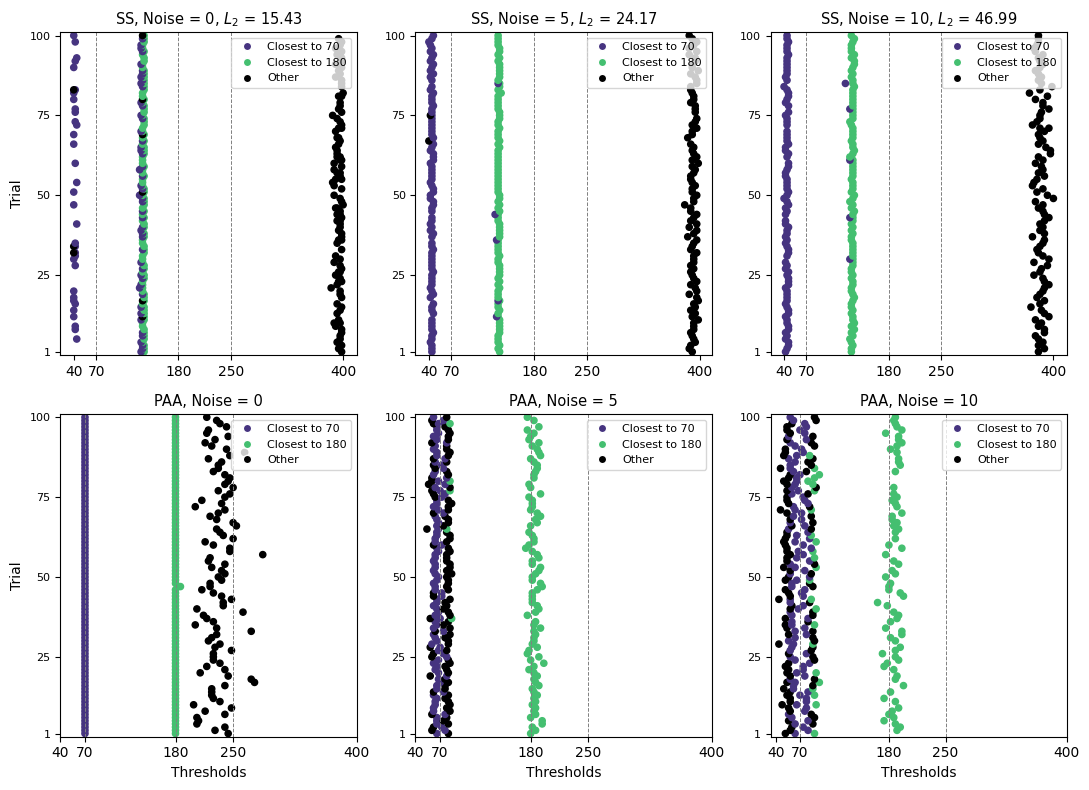

In [ ]:
noise_levels = [0, 5, 10]
n = 200

viridis = plt.get_cmap('viridis')
purple_color = viridis(0.15)  # viridis purple value
green_color = viridis(0.7)    # viridis green value

plt.figure(figsize=(11, 8))

methods_name = ['SS', 'PAA']  # Methods

for k, method_name in enumerate(methods_name):
    for i, noise in enumerate(noise_levels):
        ax = plt.subplot(2, 3, k * 3 + i + 1)

        # Load data for each method
        if method_name == 'SS':
            with open(f"results/simulation2/ss-n{n}-noise{noise}_Loss2.pkl", 'rb') as f:
                res = pickle.load(f)
            thresholds = np.array([r['thresholds_history'] for r in res])
            loss = np.array([r['loss_history'][3] for r in res]) / 1000

        elif method_name == 'PAA':
            with open(f'results/simulation2/paa-n{n}-noise{noise}.pkl', "rb") as f:
                res = pickle.load(f)
            thresholds = np.array([r['thres_history'][-2] for r in res])
            loss = None  # No loss provided for PAA in your code

        # Scatter plot for thresholds
        for j in range(thresholds.shape[0]):
            trial = [j + 1] * 3
            color = ['black'] * 3
            blue_idx = np.argmin(np.abs(thresholds[j, :] - 70))
            green_idx = np.argmin(np.abs(thresholds[j, :] - 180))
            color[blue_idx] = purple_color
            color[green_idx] = green_color
            ax.scatter(thresholds[j, :], trial, c=color, s=20)

        # Vertical lines for base thresholds
        plt.vlines([70, 180, 250], 0, 101, linestyle='--', color='grey', linewidth=0.7)
        
        plt.ylim(0, 101)
        plt.xticks([40, 70, 180, 250, 400])
        plt.yticks([1, 25, 50, 75, 100], fontsize=8)

        # Set title
        title = f"{method_name}, Noise = {noise}"
        if loss is not None:
            title += r", $L_2$ = {:.2f}".format(np.mean(loss))
        plt.title(title, fontsize=10.5)

        # Axis labels
        if k == 1:  # Bottom row
            plt.xlabel('Thresholds')
        if i == 0:  # Left column
            plt.ylabel('Trial')

        # Add legend
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', label='Closest to 70', markerfacecolor=purple_color, markersize=6),
            Line2D([0], [0], marker='o', color='w', label='Closest to 180', markerfacecolor=green_color, markersize=6),
            Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='black', markersize=6)
        ]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
# plt.savefig("./images/setting2-K3.png", dpi=400, bbox_inches="tight")
plt.show()


##### K=2 thresholds

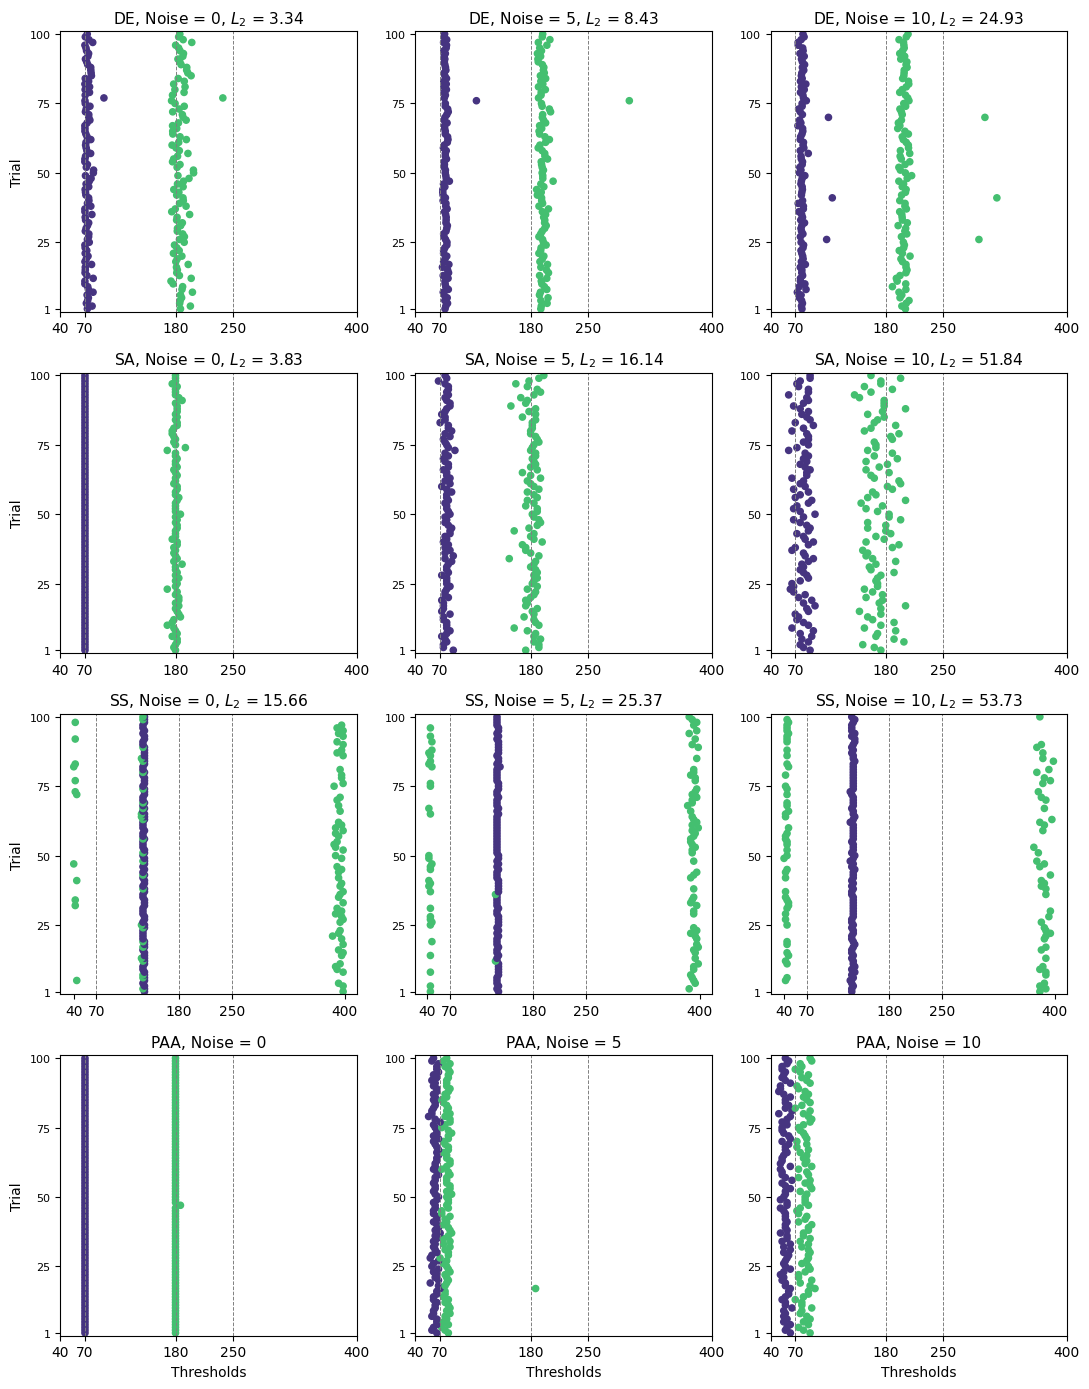

In [ ]:
noise_levels = [0, 5, 10]
n = 200

viridis = plt.get_cmap('viridis')
purple_color = viridis(0.15)  # viridis purple value
green_color = viridis(0.7)    # viridis green value

plt.figure(figsize=(11, 14))

methods_name = ['DE', 'SA', 'SS', 'PAA']  # Methods

for k, method_name in enumerate(methods_name):
    for i, noise in enumerate(noise_levels):
        ax = plt.subplot(4, 3, k * 3 + i + 1)

        # Load data for each method
        if method_name == 'DE':
            with open(f'results/simulation2/de-n{n}K2_noise{noise}_Loss2.pkl', 'rb') as fi:
                res = pickle.load(fi)
            thresholds = np.stack([result[0] for result in res])[:, 1:3]
            loss = np.array([result[1] for result in res]) / 1000

        elif method_name == 'SA':
            with open(f"results/simulation2/sa-n{n}K2-noise{noise}_Loss2.pkl", 'rb') as f:
                res = pickle.load(f)
            thresholds = np.array([r['thresholds_history'][-1] for r in res])[:, 0, :]
            loss = np.array([r['loss_history'][2] for r in res]) / 1000

        elif method_name == 'SS':
            with open(f"results/simulation2/ss-n{n}-noise{noise}_Loss2.pkl", 'rb') as f:
                res = pickle.load(f)
            thresholds = np.array([r['thresholds_history'][:2] for r in res])
            loss = np.array([r['loss_history'][2] for r in res]) / 1000

        elif method_name == 'PAA':
            with open(f'results/simulation2/paa-n{n}-noise{noise}.pkl', "rb") as f:
                res = pickle.load(f)
            thresholds = np.array([r['thres_history'][-1] for r in res])
            loss = None  # No loss provided

        # Scatter plot for thresholds
        for j in range(thresholds.shape[0]):
            trial = [j + 1] * 2
            color = [purple_color, green_color]
            ax.scatter(thresholds[j, :], trial, c=color, s=20)

        # Vertical lines for base thresholds
        plt.vlines([70, 180, 250], 0, 101, linestyle='--', color='grey', linewidth=0.7)
        
        plt.ylim(0, 101)
        plt.xticks([40, 70, 180, 250, 400])
        plt.yticks([1, 25, 50, 75, 100], fontsize=8)

        # Set title
        title = f"{method_name}, Noise = {noise}"
        if loss is not None:
            title += r", $L_2$ = {:.2f}".format(np.mean(loss))
        plt.title(title, fontsize=11.2)

        # Axis labels
        if k == 3:  # Bottom row
            plt.xlabel('Thresholds')
        if i == 0:  # Left column
            plt.ylabel('Trial')

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.tight_layout()
# plt.savefig("./images/setting2-K2.png", dpi=400, bbox_inches="tight")
plt.show()

## Visualization of simulated data via quantiles

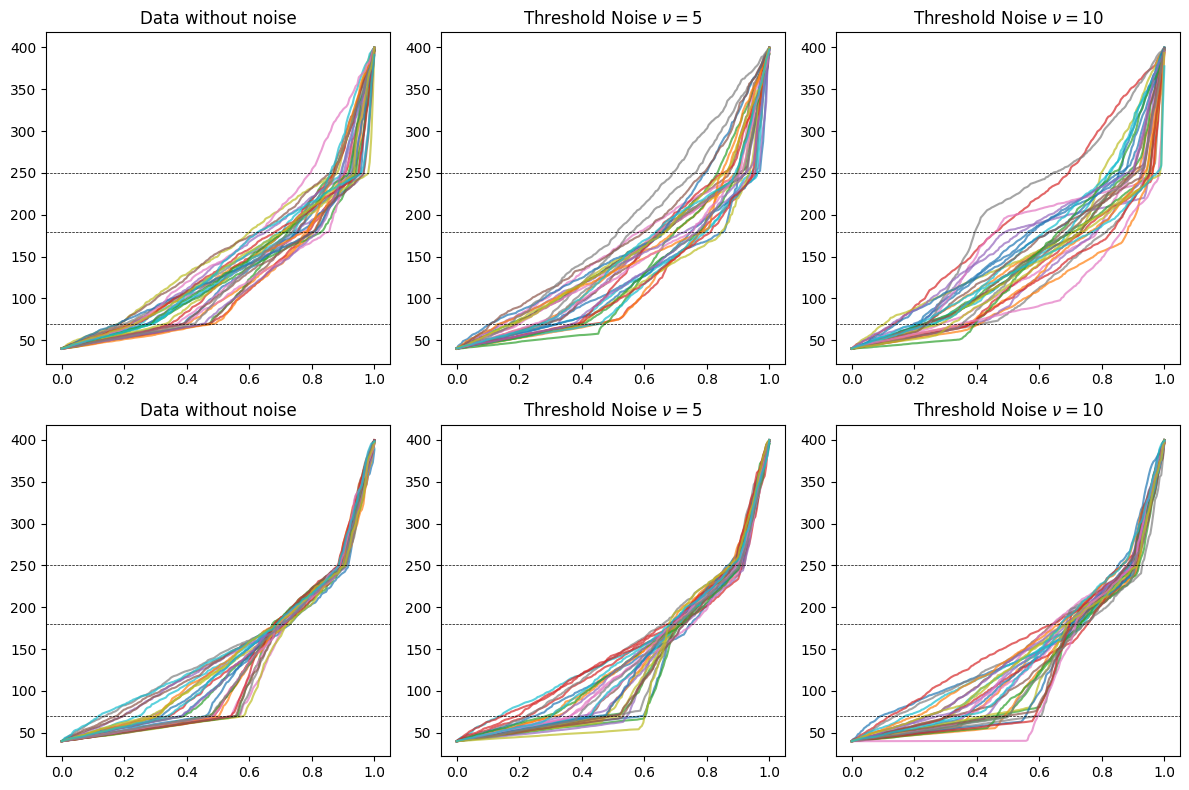

In [ ]:
seed = 42

n = 30
thresholds = (40, 70, 180, 250, 400)
gr = np.linspace(0, 1, 202)  # Grid for quantile calculation
settings = ["Setting1", "Setting2"]

# Data generation for each setting and noise level
data_by_setting = {}
for setting in settings:
    data_by_setting[setting] = {
        "Noiseless": simul_uniform_mixture(n, setting=setting, eps=0, seed=seed),
        "Noise 5": simul_uniform_mixture(n, setting=setting, eps=5, seed=seed),
        "Noise 10": simul_uniform_mixture(n, setting=setting, eps=10, seed=seed),
    }

# Plot setup
plt.figure(figsize=(12, 8))
titles = [
    'Data without noise', r"Threshold Noise $\nu=5$", r"Threshold Noise $\nu=10$",
    'Data without noise', r"Threshold Noise $\nu=5$", r"Threshold Noise $\nu=10$"
]

# Plotting loop
for i, (setting, data_dict) in enumerate(data_by_setting.items()):
    for j, (noise_label, data) in enumerate(data_dict.items()):
        plt.subplot(2, 3, i * 3 + j + 1)

        # Plot quantiles for each dataset
        for k in range(n):
            plt.plot(gr, np.quantile(data[k], gr), alpha=0.7)

        # Add horizontal threshold lines
        for threshold in thresholds[1:-1]:
            plt.axhline(threshold, color='black', linestyle='--', linewidth=0.5)

        # Set subplot title
        plt.title(titles[i * 3 + j])

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig("./images/supp-quantiles.png", dpi=400, bbox_inches='tight')
plt.show()